In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib


2022-07-04 08:47:24.278502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 08:47:24.278541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
#Load images dir

data_dir = pathlib.Path("../datasets/camtest_edited")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
close = list(data_dir.glob('Open/*'))
opn = list(data_dir.glob('Close/*'))


30


In [6]:
#Define some default variables

batch_size = 2 #total of 2
img_height = 360
img_width = 630

Found 30 files belonging to 2 classes.
Using 21 files for training.
Found 30 files belonging to 2 classes.
Using 9 files for validation.


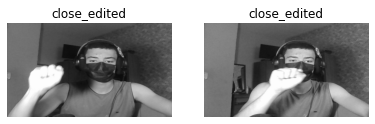

In [11]:
#Create training dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


#Create test dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Define number of classes
classes = train_ds.class_names
lenClasses = len(classes)

#Visualize data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [12]:
# Aplicando algumas mudanças no dataset, para melhorar o funcionamento da rede neural
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#Teste em um modelo padrão

model = tf.keras.Sequential()

model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(img_height, img_width, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape=(img_height, img_width, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', input_shape=(img_height, img_width, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1024, activation='sigmoid'))
model.add(tf.keras.layers.Dense(lenClasses, activation='softmax'))

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy', 
  metrics=['accuracy',
           tf.keras.metrics.Recall(),
           tf.keras.metrics.Precision(),
          tf.keras.metrics.FalsePositives(),
          tf.keras.metrics.FalseNegatives(),
          tf.keras.metrics.TrueNegatives(),
          tf.keras.metrics.TruePositives()])

#Treinando
Nepochs = 1
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=Nepochs
)

#Testando
results = model.evaluate(val_ds)
print(f"Results with {Nepochs} training epochs:")
print(f"Accuracy: {results[1]}")
print(f"Recall: {results[2]}")
print(f"Precision: {results[3]}")


2022-07-04 08:48:44.332284: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3680501760 exceeds 10% of free system memory.
2022-07-04 08:48:45.106805: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3680501760 exceeds 10% of free system memory.
